In [61]:
 import numpy as np
 import matplotlib.pyplot as plt
 import cv2
 import tensorflow as tf
 import os

In [62]:
mnist = tf.keras.datasets.mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train = tf.keras.utils.normalize(x_train, axis = 1)
x_test = tf.keras.utils.normalize(x_test, axis = 1)


In [63]:
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Flatten(input_shape = (28, 28)))
model.add(tf.keras.layers.Dense(128, activation='relu'))
model.add(tf.keras.layers.Dense(128, activation='relu'))
model.add(tf.keras.layers.Dense(10, activation='softmax'))

In [69]:
model.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])
model.fit(x_train, y_train, epochs = 8)
model.save('Digit-recognition.model')

Epoch 1/8
1875/1875 [==============================] - 5s 2ms/step - loss: 0.0049 - accuracy: 0.9989
Epoch 2/8
1875/1875 [==============================] - 5s 2ms/step - loss: 0.0065 - accuracy: 0.9984
Epoch 3/8
1875/1875 [==============================] - 5s 2ms/step - loss: 0.0051 - accuracy: 0.9987
Epoch 4/8
1875/1875 [==============================] - 5s 2ms/step - loss: 0.0043 - accuracy: 0.9988
Epoch 5/8
1875/1875 [==============================] - 5s 2ms/step - loss: 0.0038 - accuracy: 0.9990
Epoch 6/8
1875/1875 [==============================] - 5s 2ms/step - loss: 0.0050 - accuracy: 0.9987
Epoch 7/8
1875/1875 [==============================] - 5s 2ms/step - loss: 0.0050 - accuracy: 0.9989
Epoch 8/8
1875/1875 [==============================] - 5s 2ms/step - loss: 0.0051 - accuracy: 0.9989
INFO:tensorflow:Assets written to: Digit-recognition.model/assets


In [70]:
model = tf.keras.models.load_model('Digit-recognition.model')
loss, accuracy = model.evaluate(x_test, y_test)

print(loss)
print(accuracy)

313/313 [==============================] - 1s 1ms/step - loss: 0.2003 - accuracy: 0.9793
0.2002866119146347
0.9793000221252441


This digit is probably a 0


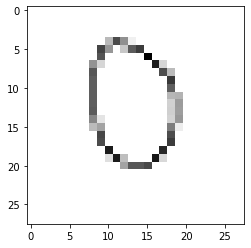

This digit is probably a 2


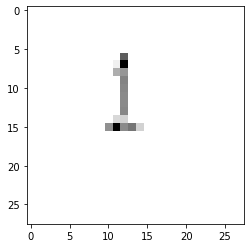

This digit is probably a 2


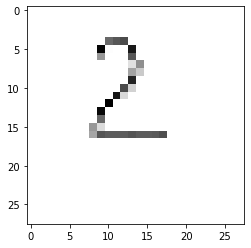

This digit is probably a 3


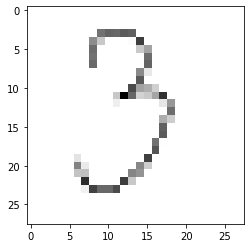

This digit is probably a 8


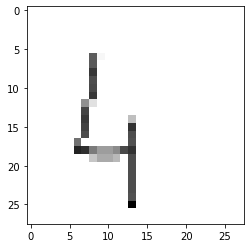

This digit is probably a 5


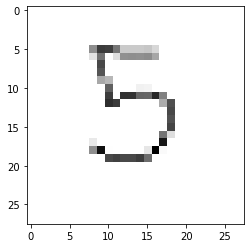

This digit is probably a 8


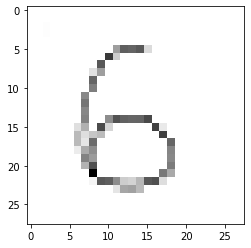

This digit is probably a 7


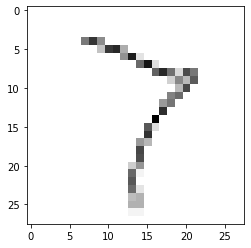

This digit is probably a 8


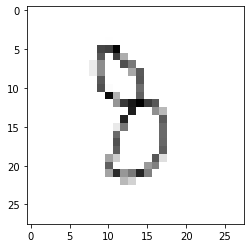

This digit is probably a 3


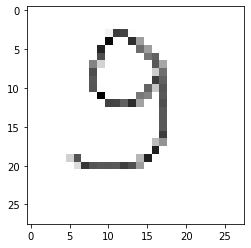

In [71]:
image_number = 0
while os.path.isfile(f"digits/dig{image_number}.png"):
  try:    
    img = cv2.imread(f"digits/dig{image_number}.png")[:, :, 0]
    img=np.invert(np.array([img]))
    prediction = model.predict(img)
    print(f"This digit is probably a {np.argmax(prediction)}")
    plt.imshow(img[0], cmap = plt.cm.binary)
    plt.show()
  except:
    print("Error!")
  finally:
    image_number += 1